# Plots

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

## Training set size

In [2]:
all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
all_memory_usages = []
all_model_sizes = []

all_delta_accuracies = []
all_delta_precisions = []
all_delta_recalls = []
all_delta_f1_scores = []
all_delta_memory_usages = []
all_delta_model_sizes = []

for seed in range(0, 50, 10):
    df = pd.read_csv(f'./data/results/training_size/training_size_results_seed{seed}.csv')
    
    all_accuracies.append(df['accuracy'].to_list())
    all_precisions.append(df['precision'].to_list())
    all_recalls.append(df['recall'].to_list())
    all_f1_scores.append(df['f1-score'].to_list())
    all_memory_usages.append(df['memory_usage'].to_list())
    all_model_sizes.append(df['model_size'].to_list())
    
    all_delta_accuracies.append(df['accuracy'].diff().values.tolist())
    all_delta_precisions.append(df['precision'].diff().values.tolist())
    all_delta_recalls.append(df['recall'].diff().values.tolist())
    all_delta_f1_scores.append(df['f1-score'].diff().values.tolist())
    all_delta_memory_usages.append(df['memory_usage'].diff().values.tolist())
    all_delta_model_sizes.append(df['model_size'].diff().values.tolist())

In [3]:
def repeat_elements(ls, n):
    return [element for element in ls for _ in range(n)]

labels = repeat_elements(df['model'].to_list(), 5)

In [4]:
import itertools

def flatten(ls):
    return list(itertools.chain(*list(zip(*ls))))

accs = flatten(all_accuracies)
prcs = flatten(all_precisions)
recs = flatten(all_recalls)
f1ss = flatten(all_f1_scores)
mems = flatten(all_memory_usages)
mods = flatten(all_model_sizes)

delta_accs = flatten(all_delta_accuracies)
delta_prcs = flatten(all_delta_precisions)
delta_recs = flatten(all_delta_recalls)
delta_f1ss = flatten(all_delta_f1_scores)
delta_mems = flatten(all_delta_memory_usages)
delta_mods = flatten(all_delta_model_sizes)

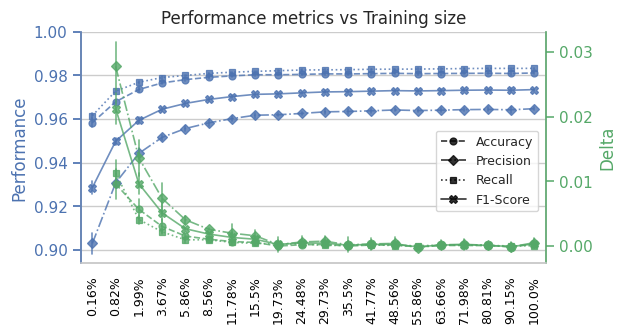

In [5]:
# https://seaborn.pydata.org/tutorial/error_bars.html

left_color = 'b'
right_color = 'g'

plt.figure(figsize=(6, 3))

sns.pointplot(y=accs, x=labels, label='Accuracy', marker='o', errorbar='sd', linestyles='--', linewidth=1.2, markersize=5, color=left_color, alpha=0.8)
sns.pointplot(y=prcs, x=labels, label='Precision', marker='D', errorbar='sd', linestyles='-.', linewidth=1.2, markersize=5, color=left_color, alpha=0.8)
sns.pointplot(y=recs, x=labels, label='Recall', marker='s', errorbar='sd', linestyles=':', linewidth=1.2, markersize=5, color=left_color, alpha=0.8)
ax = sns.pointplot(y=f1ss, x=labels, label='F1-Score', marker='X', errorbar='sd', linestyles='-', linewidth=1.2, markersize=6, color=left_color, alpha=0.8)
ax.tick_params(axis='y', colors=left_color)
ax.yaxis.grid(True)

plt.xlabel('')
plt.ylabel('Performance', color=left_color)
plt.xticks(rotation=90, color='black', fontsize=9)
plt.ylim(top=1)
# Get the legend object
legend = plt.legend()
handles = legend.legend_handles
for h in handles:
    h.set_color('black')
sns.move_legend(plt.gca(), loc='upper left', bbox_to_anchor=(0.75, 0.6), fontsize=9)

ax2 = plt.twinx()

sns.pointplot(y=delta_accs, x=labels, marker='o', errorbar='sd', linestyles='--', linewidth=1.2, markersize=5, color=right_color, alpha=0.8, ax=ax2)
sns.pointplot(y=delta_prcs, x=labels, marker='D', errorbar='sd', linestyles='-.', linewidth=1.2, markersize=5, color=right_color, alpha=0.8, ax=ax2)
sns.pointplot(y=delta_recs, x=labels, marker='s', errorbar='sd', linestyles=':', linewidth=1.2, markersize=5, color=right_color, alpha=0.8, ax=ax2)
ax = sns.pointplot(y=delta_f1ss, x=labels, marker='X', errorbar='sd', linestyles='-', linewidth=1.2, markersize=6, color=right_color, alpha=0.8, ax=ax2)

ax.yaxis.grid(False)
ax.tick_params(axis='y', colors=right_color)
ax.spines['left'].set_color(left_color)
ax.spines['right'].set_color(right_color)
# ax.spines['bottom'].set_color('darkblue')
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.1)
ax.tick_params(width=1.1)

sns.despine(top=True, right=False, left=False, bottom=False)
plt.ylabel('Delta', color=right_color)
plt.title(f'Performance metrics vs Training size')
plt.show()

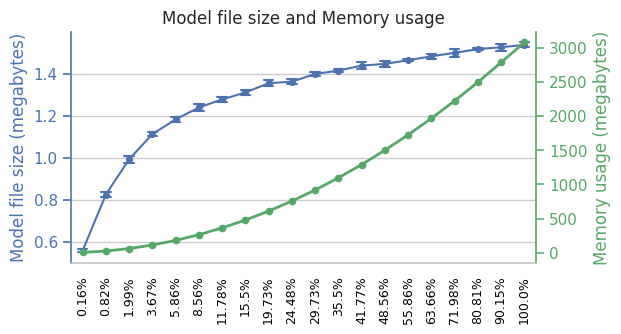

In [6]:
left_color = 'b'
right_color = 'g'

plt.figure(figsize=(6, 3))

ax = sns.pointplot(y=mods, x=labels, marker='o', errorbar='sd', capsize=.4, err_kws={"linewidth": 1.5}, linewidth=1.5, markersize=4, color=left_color)
# ax = sns.lineplot(df_results, y='model_size', x='model', linewidth=2, marker='o', color=left_color)
ax.tick_params(axis='y', colors=left_color)
ax.yaxis.grid(True)

plt.xticks(rotation=90, color='black', fontsize=9)
plt.xlabel('')
plt.ylabel('Model file size (megabytes)', color=left_color)

ax2 = plt.twinx()

ax = sns.pointplot(y=mems, x=labels, marker='o', errorbar='sd', linewidth=2, markersize=4, color=right_color, ax=ax2)
# ax = sns.lineplot(df_results, y='memory_usage', x='model', linewidth=2, marker='o', color=right_color, ax=ax2)
ax.yaxis.grid(False)
ax.tick_params(axis='y', colors=right_color)
ax.spines['left'].set_color(left_color)
ax.spines['right'].set_color(right_color)
# ax.spines['bottom'].set_color('darkblue')
ax.spines['left'].set_linewidth(1.1)
ax.spines['right'].set_linewidth(1.1)
ax.spines['bottom'].set_linewidth(1.1)
ax.tick_params(width=1.1)

sns.despine(top=True, right=False, left=False, bottom=False)
plt.ylabel('Memory usage (megabytes)', color=right_color)
plt.title(f'Model file size and Memory usage')
plt.show()

## Feature Selection

### Training file size

In [7]:
def get_file_size(file_path):
    return (os.path.getsize(file_path) / 1024) / 1024

In [8]:
all_file_size_df = []
for seed in range(0, 50, 10):
    df = pd.DataFrame({
        'model': ['Baseline', 'Mutual Information', 'Markov Blanket', 'Boruta', 'RFE', 'Random Features'],
        'train_file_size': [
            get_file_size(f'./data/datasets/features/train_263-features_seed{seed}.csv'),
            get_file_size(f'./data/datasets/features/train_features_mutual-information_seed{seed}.csv'),
            get_file_size(f'./data/datasets/features/train_features_markov-blanket_seed{seed}.csv'),
            get_file_size(f'./data/datasets/features/train_features_boruta_seed{seed}.csv'),
            get_file_size(f'./data/datasets/features/train_features_rfe_seed{seed}.csv'),
            get_file_size(f'./data/datasets/features/train_features_random-features_seed{seed}.csv')
        ]
    })
    all_file_size_df.append(df)

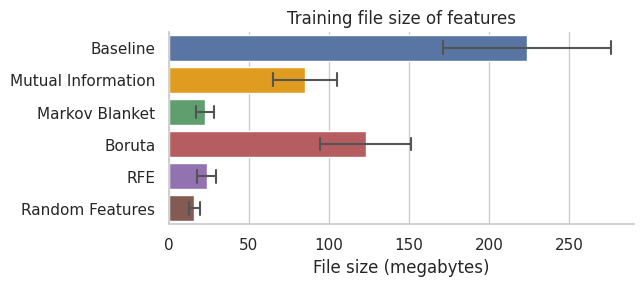

In [9]:
plt.figure(figsize=(6, 2.5))

sns.barplot(
    pd.concat(all_file_size_df), 
    y='model', x='train_file_size', 
    errorbar="sd", capsize=.4, 
    err_kws={"color": ".33", "linewidth": 1.5}, 
    palette=["b", "orange", "g", "r", "tab:purple", "tab:brown"]
)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.title('Training file size of features')
plt.ylabel('')
plt.xlabel('File size (megabytes)')
plt.show()

### Performance metrics

In [10]:
all_metrics_df = []
for seed in range(0, 50, 10):
    # baseline
    df_baseline = pd.read_csv(f'./data/results/training_size/training_size_results_seed{seed}.csv')
    df_baseline = df_baseline[['model', 'accuracy', 'precision', 'recall', 'f1-score']]
    df_baseline = df_baseline[df_baseline['model'] == '100.0%'].reset_index(drop=True)
    df_baseline = df_baseline.rename(columns={
        'accuracy': 'Accuracy',
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    df_baseline = df_baseline.replace({'100.0%': 'Baseline'})
    all_metrics_df.append(df_baseline)
    
    # feature selection
    df = pd.read_csv(f'./data/results/feature_selection/metrics/feature_selection_metrics_seed{seed}.csv')
    df = df.rename(columns={
        'accuracy': 'Accuracy',
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    df = df.replace(to_replace=r'RFE(.*)', value='RFE', regex=True)
    all_metrics_df.append(df)
    
    # random features
    df_random = pd.read_csv(f'./data/results/feature_selection/metrics/random_features_metrics_test_seed{seed}.csv')
    df_random = df_random.rename(columns={
        'accuracy': 'Accuracy',
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    df_random = df_random.replace(to_replace=r'Random(.*)', value='Random Features', regex=True)
    all_metrics_df.append(df_random)
    
df = pd.melt(pd.concat(all_metrics_df), id_vars=['model'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df

,model,variable,value
0,Baseline,Accuracy,0.981273
1,Mutual Information,Accuracy,0.979288
2,Markov Blanket,Accuracy,0.977676
3,Boruta,Accuracy,0.979956
4,RFE,Accuracy,0.976455
...,...,...,...
695,Random Features,F1-Score,0.791385
696,Random Features,F1-Score,0.563196
697,Random Features,F1-Score,0.653227
698,Random Features,F1-Score,0.569868


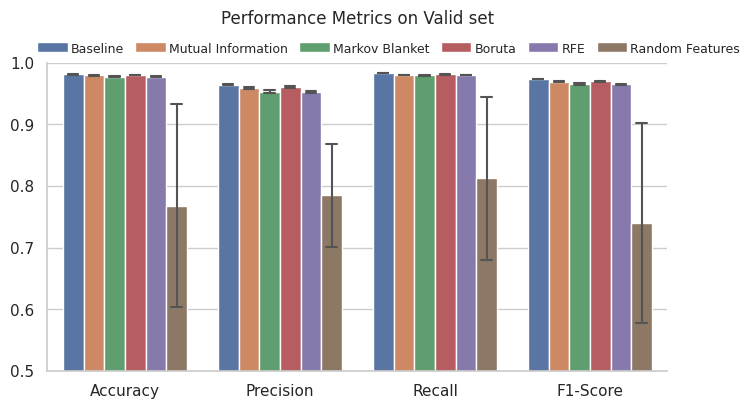

In [11]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(df, x='variable', y='value', hue='model', errorbar="sd", capsize=.4, err_kws={"color": ".33", "linewidth": 1.5})
sns.despine(top=True, right=True, left=False, bottom=False)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.55, 0.98), handletextpad=0.2, columnspacing=0.75, ncol=6, title=None, frameon=False)

plt.title('Performance Metrics on Valid set', y=1.1)
plt.setp(ax.get_legend().get_texts(), fontsize='9')
plt.ylabel('')
plt.xlabel('')
plt.ylim((0.5, 1))
plt.show()

### Inference Time with Raspberry Pi 4

In [12]:
all_time_df = []
for seed in range(0, 50, 10):
    df_mi = pd.read_csv(f'./data/results/inference_time/test_inference_time_mi_seed{seed}.csv')
    df_mi = df_mi.rename(columns={'inference_time': 'Mutual Information'})

    df_mb = pd.read_csv(f'./data/results/inference_time/test_inference_time_mb_seed{seed}.csv')
    df_mb = df_mb.rename(columns={'inference_time': 'Markov Blanket'})

    df_boruta = pd.read_csv(f'./data/results/inference_time/test_inference_time_boruta_seed{seed}.csv')
    df_boruta = df_boruta.rename(columns={'inference_time': 'Boruta'})

    df_rfe = pd.read_csv(f'./data/results/inference_time/test_inference_time_rfe_seed{seed}.csv')
    df_rfe = df_rfe.rename(columns={'inference_time': 'RFE'})

    df_random = pd.read_csv(f'./data/results/inference_time/test_inference_time_random-features_seed{seed}.csv')
    df_random = df_random.rename(columns={'inference_time': 'Random Features'})
    
    df = pd.concat([
        df_mi,
        df_mb,
        df_boruta,
        df_rfe,
        df_random
    ], axis=1)
    all_time_df.append(df)

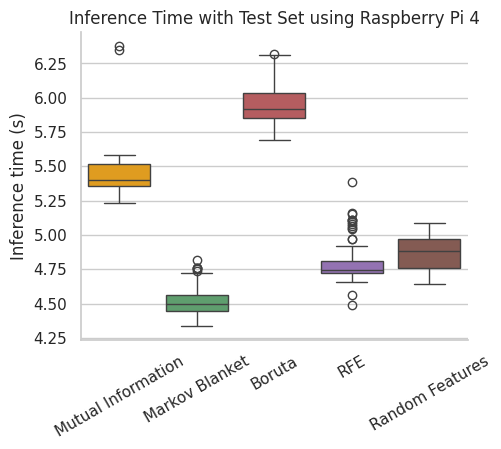

In [13]:
plt.figure(figsize=(5, 4))

colors = ["orange", "g", "r", "tab:purple", "tab:brown"]
sns.boxplot(pd.melt(df), x="variable", y="value", palette=colors)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.title('Inference Time with Test Set using Raspberry Pi 4')
plt.ylabel('Inference time (s)')
plt.xlabel('')
plt.xticks(rotation=30)
plt.show()

### Pipeline time

In [14]:
all_pipeline_df = []
for seed in range(0, 50, 10):
    df = pd.read_csv(f'./data/results/feature_selection/pipeline/pipeline_times_seed{seed}.csv')
    
    total_times = df.sum(numeric_only=True)
    total_times['Type'] = 'Total Pipeline Time'
    
    df.loc[-1] = total_times
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    
    df = pd.melt(df, id_vars=['Type'], value_vars=['Mutual Information', 'Markov Blanket', 'Boruta', 'RFE'])
    
    all_pipeline_df.append(df)

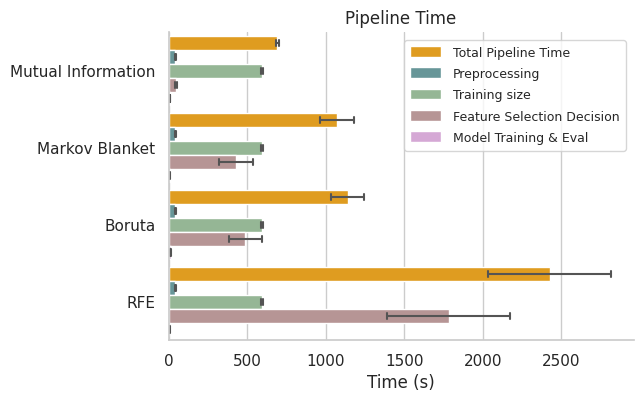

In [15]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    pd.concat(all_pipeline_df), 
    y='variable', x='value', 
    hue='Type', 
    errorbar="sd", capsize=.4, 
    err_kws={"color": ".33", "linewidth": 1.5}, 
    palette=["orange", "cadetblue", "darkseagreen", "rosybrown", 'plum'], 
    width=0.9
)
sns.despine(top=True, right=True, left=False, bottom=False)
sns.move_legend(ax, 'upper right', title=None, frameon=True)

plt.title('Pipeline Time')
plt.setp(ax.get_legend().get_texts(), fontsize='9')
plt.ylabel('')
plt.xlabel('Time (s)')
plt.show()